In [1]:
%cd ..

/mnt/s/Keep working hard/projects/python/farich-pics


In [2]:
%load_ext autoreload
%autoreload 2

In [169]:
from farichlib.DataPreprocessing import DataPreprocessing

In [170]:
%%time
dp = DataPreprocessing('data/farichSimRes_pi-kaon-_1000MeV_0-90deg_50.0k_2020-02-11.root')

CPU times: user 45.3 s, sys: 844 ms, total: 46.1 s
Wall time: 59.1 s


In [190]:
len(dp.X)

25508

In [196]:
yy = pd.DataFrame( dp.y )

In [198]:
yy = yy.assign( tt= pd.Series(dp.X) )

In [206]:
type(yy['tt'][0])

scipy.sparse.coo.coo_matrix

In [217]:
import pickle
with open('data.pickle', 'wb') as f:
    pickle.dump((dp.X, dp.y), f)

In [218]:
with open('data.pickle', 'rb') as f:
    X_n, y_n = pickle.load(f)

In [220]:
y_n

array([[32., 38., 14.],
       [32., 38., 14.],
       [32., 38., 14.],
       ...,
       [32., 38., 14.],
       [32., 38., 14.],
       [32., 38., 14.]])

In [67]:
import uproot
rootFile = 'data/farichSimRes_pi-kaon-_1000MeV_0-90deg_50.0k_2020-02-11.root'
info_tree = uproot.open(rootFile)["info_sim"]
raw_tree = uproot.open(rootFile)["raw_data"]

In [95]:
info_arrays = info_tree.arrays()
info_arrays

{b'events': array([50000], dtype=int32),
 b'momentum': array([1000.]),
 b'theta': array([0.]),
 b'phi': array([1.57079633]),
 b'zDis': array([1.]),
 b'layers': array([4], dtype=int32),
 b'layers.first': <JaggedArray [[1.041 1.0438 1.0468 1.05]] at 0x7f7370488090>,
 b'layers.second': <JaggedArray [[9.32 8.93 8.55 8.2]] at 0x7f7370488f90>,
 b'name': <ObjectArray [b'SensL_ARRAYJ-30020-64P-PCB_25V'] at 0x7f7370489e90>,
 b'num_side_x': array([8], dtype=int32),
 b'num_side_y': array([17], dtype=int32),
 b'gap': array([1.]),
 b'size': array([26.68]),
 b'chip_num_size': array([8], dtype=int32),
 b'chip_pitch': array([0.2]),
 b'chip_size': array([3.16]),
 b'chip_offset': array([0.]),
 b'focal_length': array([200.]),
 b'trg_window': array([20.]),
 b'origin_pos._2': array([201.]),
 b'origin_pos._1': array([106.72]),
 b'origin_pos._0': array([0.])}

In [104]:
108.64*2

217.28

In [124]:
x_size = info_arrays[b'num_side_x'][0]
x_center = info_arrays[b'origin_pos._0'][0]
chip_size = info_arrays[b'chip_num_size'][0]
pmt_size = info_arrays[b'size'][0]
gap = info_arrays[b'gap'][0]
y_size = info_arrays[b'num_side_y'][0]
y_center = info_arrays[b'origin_pos._1'][0]

xmin = x_center - (x_size*pmt_size + (x_size-1)*gap + 3.16)/2
xmax = x_center + (x_size*pmt_size + (x_size-1)*gap + 3.16)/2
xbins = x_size*chip_size
print(xmin, xmax, xbins)

ymin = y_center -(y_size*pmt_size + (y_size-1)*gap + 3.16)/2
ymax = y_center + (y_size*pmt_size + (y_size-1)*gap + 3.16)/2
ybins = y_size*chip_size
print(ymin, ymax, ybins)

-111.8 111.8 64
-129.64000000000001 343.08000000000004 136


In [68]:
raw_df = raw_tree.pandas.df()

In [69]:
raw_df.drop(['id_event','id_primary', 'hits.theta.first',
             'hits.theta.second','hits.phi.first','hits.phi.second','hits.pos_vertex._2',
             'hits.pos_vertex._1','hits.pos_vertex._0','hits.dir_vertex._2',
             'hits.dir_vertex._1','hits.dir_vertex._0','hits.id_pmt','hits.id_chip',
             'hits.id_layer'], axis=1).describe()

,pos_primary._2,pos_primary._1,pos_primary._0,dir_primary._2,dir_primary._1,dir_primary._0,hits,hits.id_track,hits.id_track_parent,hits.id_hit,hits.wavelength,hits.time,hits.pos_exact._2,hits.pos_exact._1,hits.pos_exact._0,hits.pos_chip._2,hits.pos_chip._1,hits.pos_chip._0
count,993407.0,993407.000000,993407.000000,993407.0,993407.0,993407.0,993407.000000,993407.000000,993407.000000,993407.0,993407.000000,993407.000000,993407.000000,993407.000000,993407.000000,9.934070e+05,993407.000000,993407.000000
mean,0.0,0.004829,-0.006412,1.0,0.0,0.0,40.765470,245.442823,2.550117,0.0,427.671705,0.716711,201.000570,3.791223,0.015351,2.010500e+02,3.792310,0.015192
std,0.0,0.969555,0.969505,0.0,0.0,0.0,7.795391,133.685231,19.852174,0.0,108.187371,0.087131,0.006132,47.696520,39.296890,2.496166e-09,47.718007,39.318050
min,0.0,-1.679763,-1.679778,1.0,0.0,0.0,1.000000,2.000000,1.000000,0.0,200.049021,0.671925,201.000000,-128.059814,-110.216036,2.010500e+02,-126.480000,-108.640000
25%,0.0,-0.827906,-0.845975,1.0,0.0,0.0,36.000000,137.000000,1.000000,0.0,348.774747,0.696598,201.000000,-35.261286,-37.159636,2.010500e+02,-36.720000,-36.480000
50%,0.0,-0.000010,-0.015476,1.0,0.0,0.0,40.000000,253.000000,1.000000,0.0,410.311039,0.697337,201.000000,1.651972,-0.505239,2.010500e+02,1.040000,-2.080000
75%,0.0,0.842198,0.831608,1.0,0.0,0.0,45.000000,353.000000,1.000000,0.0,483.119867,0.698236,201.000000,38.443551,37.230225,2.010500e+02,39.600000,36.480000
max,0.0,1.679900,1.679988,1.0,0.0,0.0,113.000000,4301.000000,2625.000000,0.0,899.990047,3.009657,201.099998,341.430033,110.218249,2.010500e+02,339.920000,108.640000


In [137]:
df = raw_df[['hits.pos_chip._0','hits.pos_chip._1']].rename({'hits.pos_chip._0':'x','hits.pos_chip._1':'y'}, axis=1)

In [138]:
bins = np.linspace(-100, 100, 100)
df['x'] = np.digitize(df['x'],bins)
df['y'] = np.digitize(df['y'],bins)
df['d'] = np.ones(len(df))

In [139]:
df.head()

x   y    d
entry subentry             
0     0          1  16  1.0
      1         32  33  1.0
      2         32  33  1.0
      3         32  35  1.0
      4         27  61  1.0

In [140]:
%%time
a = df.groupby('entry').apply(lambda x: coo_matrix((x['d'], (x['x'], x['y'])), shape=(101, 101)) )

CPU times: user 38.8 s, sys: 500 ms, total: 39.3 s
Wall time: 42.3 s


In [136]:
a.iloc[0]

<101x101 sparse matrix of type '<class 'numpy.float64'>'
	with 41 stored elements in COOrdinate format>

In [111]:
raw_df[(raw_df['hits.id_pmt']==1)][['hits.id_chip','hits.pos_chip._0','hits.pos_chip._1']].\
sort_values(by='hits.id_chip').apply(['min', 'max'])

,hits.id_chip,hits.pos_chip._0,hits.pos_chip._1
min,1,-108.64,-126.48
max,64,-85.12,-102.96


In [113]:
raw_df[(raw_df['hits.id_pmt']==136)][['hits.id_chip','hits.pos_chip._0','hits.pos_chip._1']].\
sort_values(by='hits.id_chip').apply(['min', 'max'])

,hits.id_chip,hits.pos_chip._0,hits.pos_chip._1
min,1,85.12,316.40
max,63,108.64,339.92


In [134]:
import numpy as np
from scipy.sparse import coo_matrix

def foo(x):
    coo = coo_matrix((x['d'], (x['x'], x['y'])), shape=(101, 101))
    return coo

In [24]:
foo(dp.df.iloc[2])

<100x100 sparse matrix of type '<class 'numpy.float64'>'
	with 43 stored elements in COOrdinate format>

In [7]:
dp.df.head()

,chipx,chipy,px,py,radius
entry,,,,,
0,"[-98.55999999999999, -36.47999999999999, -36.4...","[-67.75999999999999, -33.36000000000001, -33.3...",50,50,13
2,"[-85.11999999999999, -85.11999999999999, -57.4...","[129.35999999999999, 205.67999999999995, 118.4...",50,50,13
3,"[-33.11999999999999, -36.47999999999999, -43.1...","[-40.080000000000005, -30.000000000000007, -23...",50,50,13
4,"[-91.83999999999999, -85.11999999999999, -77.6...","[-85.35999999999999, 74.0, -30.000000000000007...",50,50,13
8,"[-33.11999999999999, -39.839999999999996, -49....","[-40.080000000000005, -30.000000000000007, -19...",50,50,13


In [160]:
X, y = dp.get_images()

In [171]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.patches import Ellipse, Circle

%matplotlib inline

In [173]:
X

array([<64x136 sparse matrix of type '<class 'numpy.float64'>'
	with 41 stored elements in COOrdinate format>,
       <64x136 sparse matrix of type '<class 'numpy.float64'>'
	with 39 stored elements in COOrdinate format>,
       <64x136 sparse matrix of type '<class 'numpy.float64'>'
	with 43 stored elements in COOrdinate format>,
       ...,
       <64x136 sparse matrix of type '<class 'numpy.float64'>'
	with 40 stored elements in COOrdinate format>,
       <64x136 sparse matrix of type '<class 'numpy.float64'>'
	with 39 stored elements in COOrdinate format>,
       <64x136 sparse matrix of type '<class 'numpy.float64'>'
	with 54 stored elements in COOrdinate format>], dtype=object)

In [180]:
r

14.0

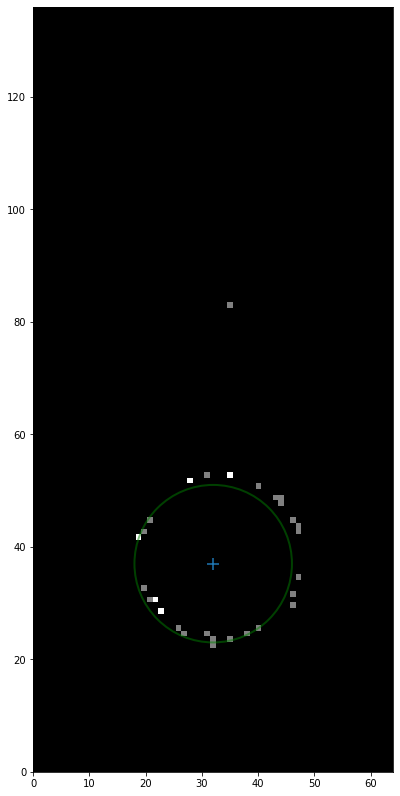

In [183]:
loc_ind = 1211
xv = y[loc_ind][0]
yv = y[loc_ind][1]
r = y[loc_ind][2]

fig = plt.figure(frameon=False, figsize=(5, 5) )
ax = plt.Axes(fig, [0., 0., 1., (H.shape[1]/H.shape[0])])
# ax.set_axis_off()
fig.add_axes(ax)

H = X[loc_ind].toarray()
xedges = np.linspace(0, H.shape[0], H.shape[0])
yedges = np.linspace(0, H.shape[1], H.shape[1])
Xg, Yg = np.meshgrid(xedges, yedges)
e = Circle(xy=(xv, yv), radius=r, linewidth=2, fill=False, edgecolor='green', alpha=0.5)
ax.pcolormesh(Xg, Yg, H.T, cmap='gray')
ax.add_artist(e)
plt.scatter(xv, yv, marker='+', s=150)